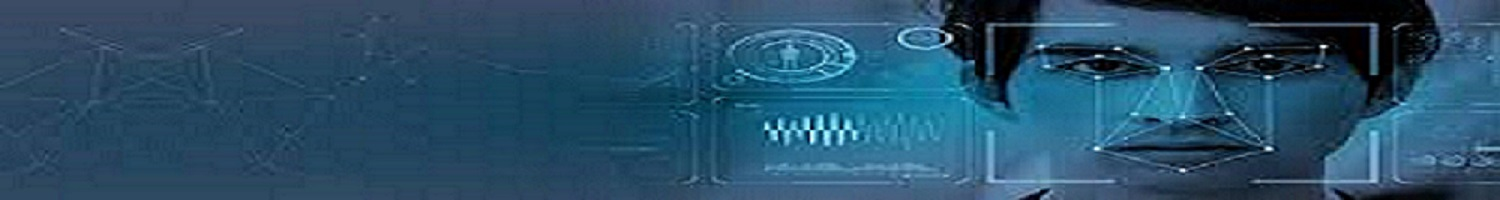

# Computer Vision FaceMask Detection Project

### AIM OF PROJECT

* The objective of this Project is to create an image classification machine learning model to accurately predict the likelihood that an image contains a person wearing a face mask, or not. The total dataset contains 1,800+ images of people either wearing masks or not.


### What is Computer Vision

* According to IBM Watson Computer vision is a field of artificial intelligence (AI) that enables computers and systems to derive meaningful information from digital images, videos and other visual inputs — and take actions or make recommendations based on that information.

* Python is a popular programming language for its simple to read syntax, similarity to the english language, and numerous libraries for machine learning, and strong community of developers. Making python the best suite for a CV project.

## 1. Data Collection 

In [ ]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from torchvision import transforms
from keras_preprocessing.image import img_to_array
import cv2 
from zipfile import ZipFile
from keras.applications.xception import Xception 
from keras.applications.xception import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import copy
from keras import Model

from keras.optimizers import RMSprop 

In [ ]:
# Unzip imported Folder 

images = r'./images.zip'

with ZipFile(images, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
# Read CSV file and the number of file names tabulated
train = pd.read_csv('train_labels.csv')
train_images_list = train['image'].to_list()
len(train_images_list)



1308

In [ ]:
pd.DataFrame(train).head()

,image,target
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,0
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,1


In [ ]:
# Using the os library to obtain the number of files in the image folder
images_list = os.listdir('images/')
len(images_list)

1817

#### From Viewing the file we can identify the following:

* The train_label .csv file has over 1300 observations 
* The image directory has over 1800 files, meaning some files are not available on the train_label csv file
* The names of the file as used as the records for the image column in the train_label csv file.
* Therefore the train_label csv file contains the train data path for the train data and the rest files in the image directory contains the test data.

In [ ]:
# Extract all files in the image dic not in the train column
test_images_list = [ti for ti in images_list if ti not in train_images_list]

In [ ]:
sub=pd.DataFrame({
    'image':test_images_list,
     'target':0
})

,image,target
0,vlxbaplwagipvtfkcjbzapysqmffld.jpg,0
1,xbuuveyzfnrozevdlhayiqncadyiof.jpg,0
2,fnkfsdjmdihrmynpqxmnrwzxessrdc.jpg,0
3,ovyapwxepknnprboziljwxeskjuiim.jpg,0
4,jdmorbhddqxvqofbotgldacezkmyjt.jpg,0


In [ ]:

pd.DataFrame(train)['target'].value_counts()

0    664
1    644
Name: target, dtype: int64

## 2. Data Visualization 

In [ ]:
image_transform=transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224)
    ])

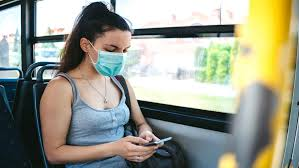

In [ ]:
from google.colab.patches import cv2_imshow
sample_path = r'./images/aelkivmayxgsdjosiibfgmkvfrjvjk.jpg'
sample_image = cv2.imread(sample_path)
img_sample1 = cv2_imshow(sample_image)

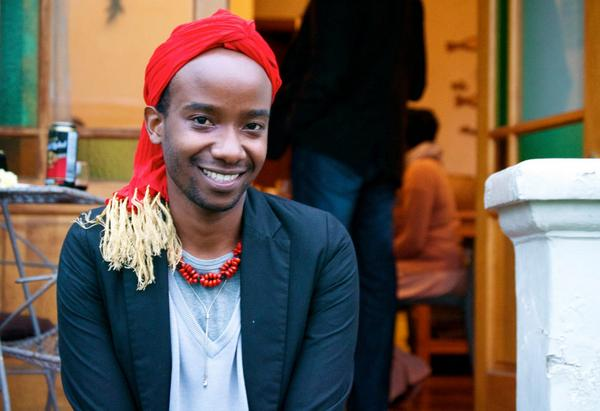

In [ ]:
sample_path2 = r'./images/tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg'
sample_image2 = cv2.imread(sample_path2)
img_sample2 = cv2_imshow(sample_image2)

## 3. Data Preprocessing / Model Training

In [ ]:
train_img=[]
for i in range(0,train.shape[0]) :
    img_path= r"./images/"+str(train.iloc[i,:].image)
    image = Image.open(img_path).convert('RGB')
    image=image_transform(image)
    image = np.array(image)
    train_img.append((image))

In [ ]:
target = np.array(train.target)
train_img=np.array(train_img)

In [ ]:
train_img=train_img/255

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), input_shape=(224,224,3) , activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.fit(train_img, target, epochs=5)

Epoch 1/5
41/41 [==============================] - 67s 2s/step - loss: 1.3284 - accuracy: 0.5680
Epoch 2/5
41/41 [==============================] - 64s 2s/step - loss: 0.6876 - accuracy: 0.6254
Epoch 3/5
41/41 [==============================] - 65s 2s/step - loss: 0.6448 - accuracy: 0.6674
Epoch 4/5
41/41 [==============================] - 65s 2s/step - loss: 0.5701 - accuracy: 0.7301
Epoch 5/5
41/41 [==============================] - 64s 2s/step - loss: 0.4838 - accuracy: 0.7882


In [ ]:
test_img=[]
for i in range(0,sub.shape[0]) :
    img_path2= r"./images/"+str(sub.iloc[i,:].image)
    test_image = Image.open(img_path2).convert('RGB')
    test_image=image_transform(test_image)
    test_image = np.array(test_image)
    test_img.append((test_image))

In [ ]:
test_img=np.array(test_img)/255

In [ ]:
predictions=model.predict(test_img)

16/16 [==============================] - 7s 408ms/step


In [ ]:
sub.target=predictions

In [ ]:
sub.to_csv('./CNN_Scratch_masks.csv',index=False)

In [ ]:
# Performance after submission == 77.5%

## Transfer Learning

* Transfer learning is generally used: To save time and resources from having to train multiple machine learning models from scratch to complete similar tasks. As an efficiency saving in areas of machine learning that require high amounts of resources.

* Through transfer learning, methods are developed to transfer knowledge from one or more of these source tasks to improve learning in a related target task. The goal of this transfer of learning strategies is help evolve machine learning tasks such as image categorisation or natural language processing

In [ ]:
train_transfer = copy.deepcopy(train_img)
test_transfer = copy.deepcopy(test_img)

In [ ]:
IMAGE_SIZE = [224, 224]

xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
# Not training existing weights
for layer in xception.layers:
  xception.trainable = False

x = tf.keras.layers.Flatten()(xception.output)

prediction = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)

trans_model = Model(inputs=xception.input, outputs=prediction)


trans_model.summary()

trans_model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
trans_model.fit(train_transfer, target, epochs=5)

Epoch 1/5
41/41 [==============================] - 219s 5s/step - loss: 0.9644 - accuracy: 0.8693
Epoch 2/5
41/41 [==============================] - 214s 5s/step - loss: 0.2933 - accuracy: 0.9511
Epoch 3/5
41/41 [==============================] - 214s 5s/step - loss: 0.1919 - accuracy: 0.9641
Epoch 4/5
41/41 [==============================] - 217s 5s/step - loss: 0.1391 - accuracy: 0.9732
Epoch 5/5
41/41 [==============================] - 215s 5s/step - loss: 0.0567 - accuracy: 0.9885


In [ ]:
predictions=trans_model.predict(test_transfer)

16/16 [==============================] - 87s 5s/step


In [ ]:
sub.target=predictions

In [ ]:
sub.to_csv('Submission_file.csv', index=False)